<a href="https://colab.research.google.com/github/speedyfuat/Machine-Learning/blob/main/bikess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

#Dataset

[https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]


In [198]:
dataset_cols = ["bike_count", "hour", "temp", "humidity","wind", "visibility","dew_pt_temp","radiation","rain","snow","func_day"]
df= pd.read_csv("SeoulBikeData.csv", encoding='latin-1').drop(["Date","Holiday","Seasons"], axis=1)

In [199]:
df.columns = dataset_cols
df["func_day"] = (df["func_day"] == "Yes").astype(int)
df=df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [200]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,func_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


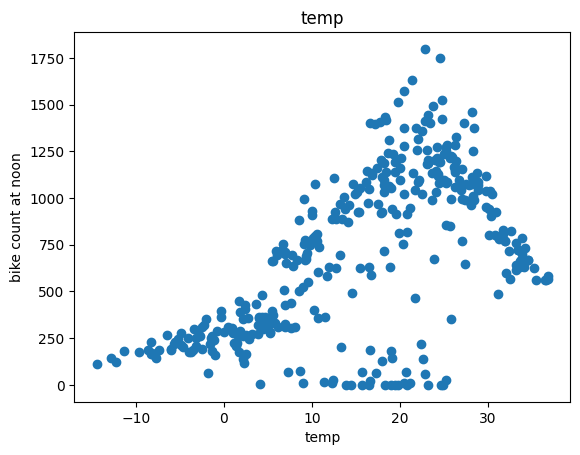

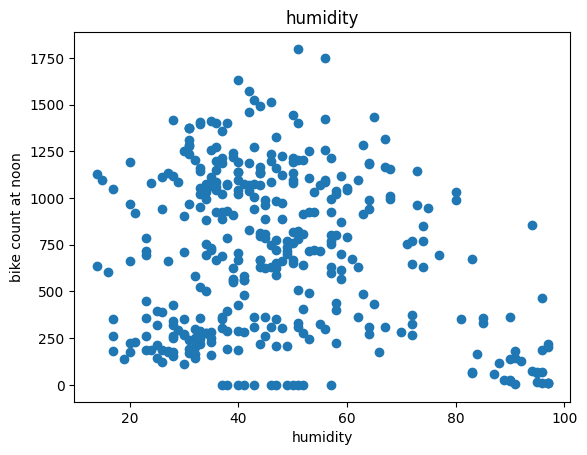

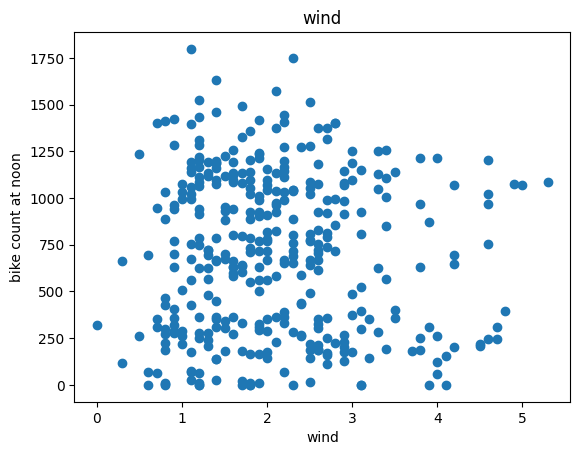

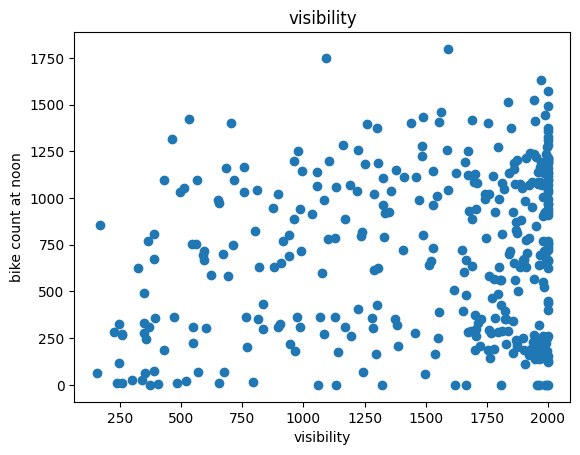

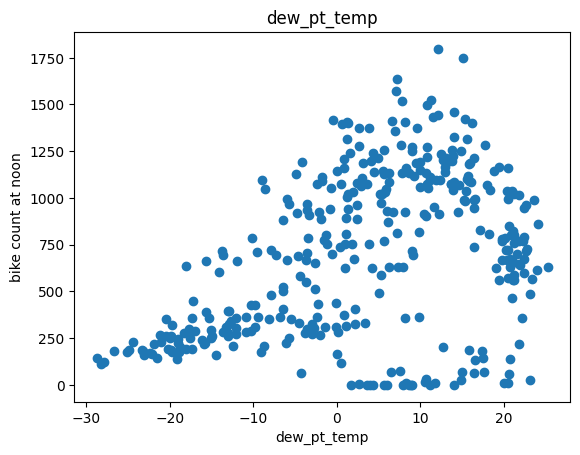

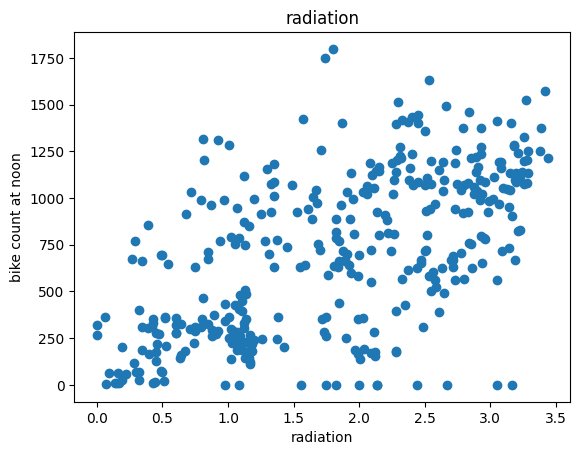

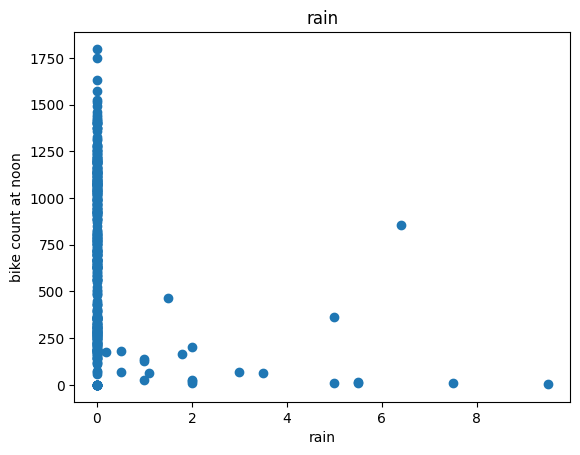

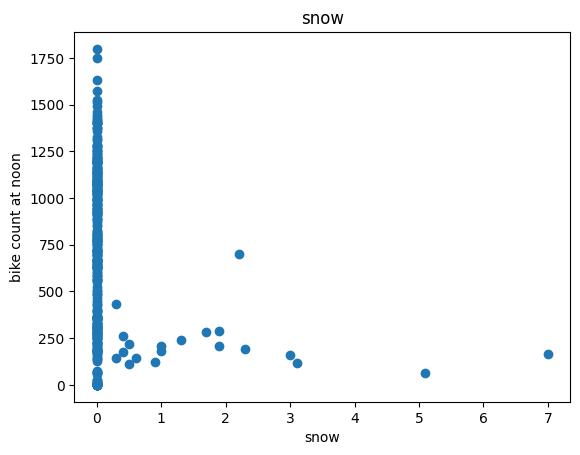

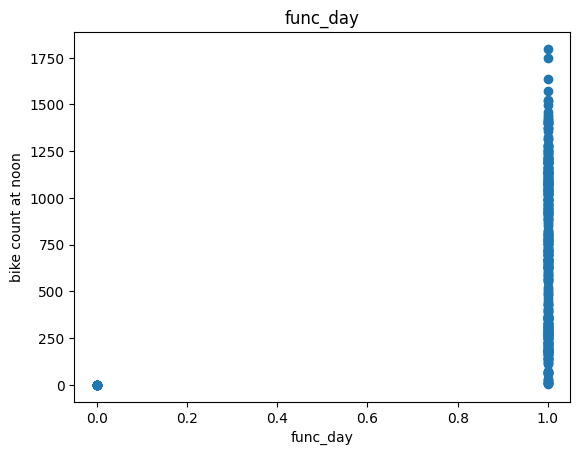

In [201]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("bike count at noon")
  plt.xlabel(label)
  plt.show()

In [202]:
df = df.drop(["wind","visibility","func_day"], axis=1)

In [203]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Train/valid/test dataset


In [204]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [205]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))
  return data, X, y

In [206]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels = ["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels = ["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels = ["temp"])

In [207]:
X_train_temp

array([[ 18.8],
       [ -6. ],
       [ 15.7],
       [ -8.3],
       [ -3.4],
       [ 26.3],
       [  9.3],
       [  4. ],
       [ -8.3],
       [  9.3],
       [ 10.4],
       [ 26.4],
       [  1.8],
       [ -5.6],
       [ 33.8],
       [ 18.2],
       [ 24.2],
       [ 30.8],
       [  3.7],
       [ 36.8],
       [ 24.5],
       [  5.6],
       [ 33.2],
       [ 23.2],
       [ 34.1],
       [ 28.2],
       [  5.3],
       [ 10.8],
       [  4.3],
       [ 21.5],
       [ -0.3],
       [  0.5],
       [ 16.8],
       [ -3.9],
       [  1.2],
       [ 19.8],
       [ 18.2],
       [ 10. ],
       [  9.4],
       [  2.2],
       [ -3.2],
       [ -2.5],
       [ 16.3],
       [ -2.5],
       [ 23.1],
       [ -6.5],
       [ 20. ],
       [ 14.7],
       [ 19.5],
       [ -1.8],
       [ 17.5],
       [  1. ],
       [ 28.9],
       [ 19. ],
       [ 10.7],
       [ 24.3],
       [ 10.6],
       [ 12.4],
       [ 27. ],
       [ -1.6],
       [ 34.1],
       [ 18. ],
       [

In [208]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [209]:
print(temp_reg.coef_)
print(temp_reg.intercept_)

[[22.41893609]]
[388.3968983]


In [210]:
temp_reg.score(X_train_temp, y_train_temp)

0.3995478951842988

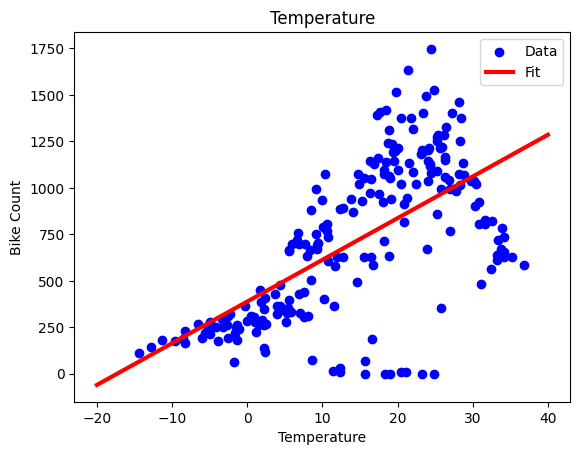

In [211]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color='red', linewidth=3)
plt.legend()
plt.title("Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

#Multiple Linear Regression

In [212]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels =df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels =df.columns[1:])

In [213]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [214]:
all_reg.score(X_test_all, y_test_all)

0.43206823981483733

In [215]:
y_pred_lr = all_reg.predict(X_test_all)

#Regression with Nerual Network


In [216]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [217]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [218]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])


In [219]:
temp_nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

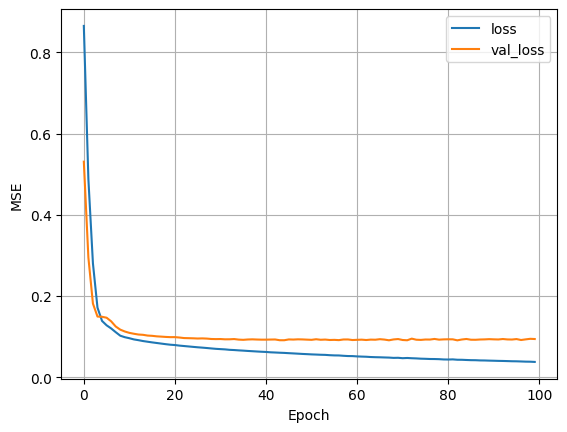

In [220]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


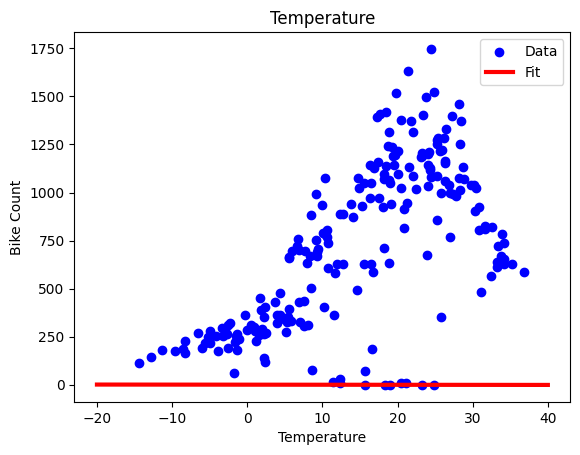

In [221]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit", color='red', linewidth=3)
plt.legend()
plt.title("Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

#Neural Net


In [222]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [223]:
history = nn_model.fit(X_train_temp,
                       y_train_temp,
                       epochs=100,
                       verbose=0,
                       validation_data=(X_val_temp, y_val_temp))

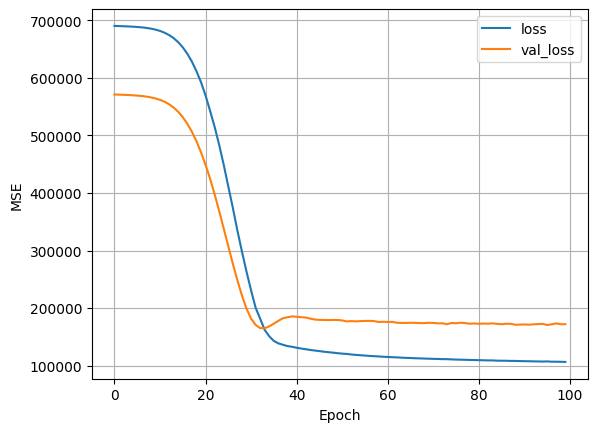

In [224]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


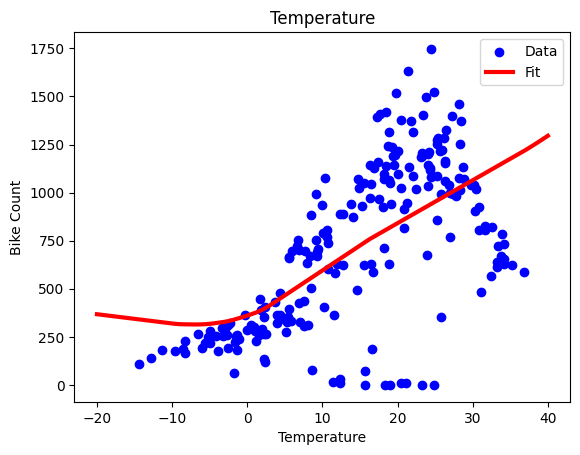

In [225]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit", color='red', linewidth=3)
plt.legend()
plt.title("Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

In [226]:

all_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
all_normalizer.adapt(X_train_all)

In [227]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [228]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

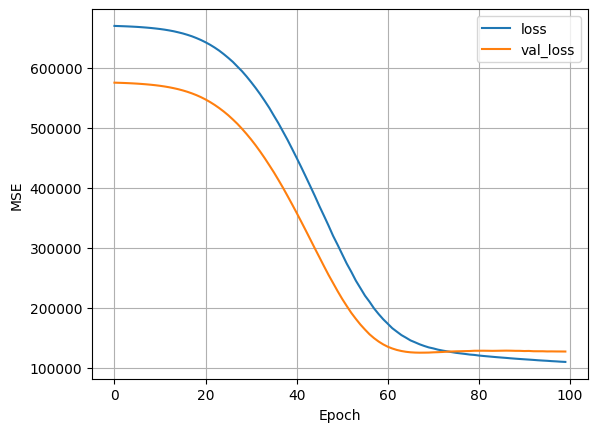

In [229]:
plot_loss(history)

In [231]:
#calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [232]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [233]:

MSE(y_pred_lr, y_test_all)

92906.8945342374

In [234]:
MSE(y_pred_nn, y_test_all)

119048.47884311574

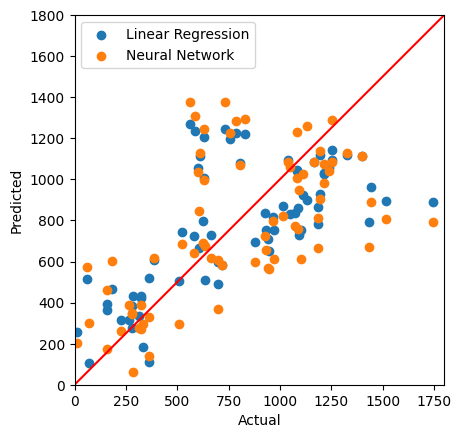

In [237]:
ax = plt.axes(aspect = 'equal')
plt.scatter(y_test_all, y_pred_lr, label = "Linear Regression")
plt.scatter(y_test_all, y_pred_nn, label = "Neural Network")
plt.xlabel("Actual")
plt.ylabel("Predicted")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c= 'red')